## Author
Jarosław Wełeszczuk

In [1]:
import pandas as pd
import sklearn.tree
import numpy as np
from sklearn.tree import DecisionTreeClassifier 
import dtreeviz.trees as dtv
from sklearn.model_selection import GridSearchCV
from dtreeviz.trees import *

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold
import matplotlib.pyplot as plt 

from sklearn.feature_selection import RFECV
import graphviz


from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score, make_scorer

import seaborn as sns

In [2]:
caly_df=pd.read_csv('Prepared_geko_data.csv',sep=';')

In [3]:
caly_df

,time,temperatur,Sleep poze,Sleep position,splashing reaction,splashing reaction 2,touch reaction,behaviour on hand,after putting away,SPz | S shape,...,TR | runs,TR | moves,BoH | no movement,BoH | runs,BoH | jumps,BoH | moves,ApA | runs,ApA | hides,ApA | moves,ApA | stayes in place
0,10,23,straight,in the hideout,No Movement,does not licks,No Movement,No Movement,stays in place,0,...,0,0,1,0,0,0,0,0,0,1
1,10,23,U shape,in the hideout,moves the head,does not licks,Runs,Runs,stays in place,0,...,1,0,0,1,0,0,0,0,0,1
2,10,23,active,active,No Movement,does not licks,No Movement,jumps,Runs,0,...,0,0,0,0,1,0,1,0,0,0
3,10,23,active,active,moves,licks,Runs,Runs,Runs,0,...,1,0,0,1,0,0,1,0,0,0
4,10,23,straight,in the hideout,moves the head,licks,Runs,No Movement,stays in place,0,...,1,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2062,16,26,straight,on coconut,moves the head,licks,No Movement,Runs,stays in place,0,...,0,0,0,1,0,0,0,0,0,1
2063,16,26,straight,back wall,moves the head,does not licks,No Movement,jumps,stays in place,0,...,0,0,0,0,1,0,0,0,0,1
2064,16,26,active,active,moves,licks,moves,Runs,moves,0,...,0,1,0,1,0,0,0,0,1,0
2065,16,26,active,active,moves,licks,moves,moves,moves,0,...,0,1,0,0,0,1,0,0,1,0


In [4]:
caly_label=caly_df['behaviour on hand']

In [5]:
del caly_df['Sleep poze']
del caly_df['Sleep position']
del caly_df['splashing reaction']
del caly_df['splashing reaction 2']
del caly_df['touch reaction']
del caly_df['behaviour on hand']
del caly_df['after putting away']

In [6]:
del caly_df['BoH | no movement']
del caly_df['BoH | runs']
del caly_df['BoH | jumps']
del caly_df['BoH | moves']

In [7]:
caly_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2067 entries, 0 to 2066
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   time                   2067 non-null   int64
 1   temperatur             2067 non-null   int64
 2   SPz | S shape          2067 non-null   int64
 3   SPz | U shape          2067 non-null   int64
 4   SPz | active           2067 non-null   int64
 5   SPz | straight         2067 non-null   int64
 6   SPs | active           2067 non-null   int64
 7   SPs | back wall        2067 non-null   int64
 8   SPs | front wall       2067 non-null   int64
 9   SPs | in the hideout   2067 non-null   int64
 10  SPs | left wall        2067 non-null   int64
 11  SPs | on coconut       2067 non-null   int64
 12  SPs | right wall       2067 non-null   int64
 13  SR | no movement       2067 non-null   int64
 14  SR | moves             2067 non-null   int64
 15  SR | moves the head    2067 non-null  

In [8]:
param_grid = {
    'criterion':['gini',
                 'entropy'
                ],
    'splitter':['best', 
                'random'
               ],
    'max_depth':list(range(2, 16,2)),
    'min_samples_split':list(range(2, 13,4)),
    'min_samples_leaf': list(range(26, 34,2)),  
    'min_weight_fraction_leaf':[0,
                                
                             #   0.4
                                
                                ],
    'max_features':[None,
                    'auto', 'sqrt', 'log2'
                   ],
    'max_leaf_nodes':list(range(6, 14,2)), 
    'min_impurity_decrease':[0], #list(range(0, 13,4)),
    
}

In [9]:
f1 = make_scorer(f1_score , average='macro')

In [10]:
dt_1 = DecisionTreeClassifier(random_state=42)
grid_search_1 = GridSearchCV(estimator = dt_1, param_grid = param_grid, 
                          cv = 2, n_jobs = 4, verbose = 1, scoring=f1)
grid_search_1.fit(caly_df, np.ravel(caly_label))

Fitting 2 folds for each of 5376 candidates, totalling 10752 fits


GridSearchCV(cv=2, estimator=DecisionTreeClassifier(random_state=42), n_jobs=4,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10, 12, 14],
                         'max_features': [None, 'auto', 'sqrt', 'log2'],
                         'max_leaf_nodes': [6, 8, 10, 12],
                         'min_impurity_decrease': [0],
                         'min_samples_leaf': [26, 28, 30, 32],
                         'min_samples_split': [2, 6, 10],
                         'min_weight_fraction_leaf': [0],
                         'splitter': ['best', 'random']},
             scoring=make_scorer(f1_score, average=macro), verbose=1)

In [11]:
grid_search_1.best_score_ #0.30392959398677244 

0.28813617438721695

In [12]:
grid_search_1.best_estimator_

DecisionTreeClassifier(max_depth=2, max_features='auto', max_leaf_nodes=6,
                       min_impurity_decrease=0, min_samples_leaf=32,
                       min_weight_fraction_leaf=0, random_state=42,
                       splitter='random')

In [13]:
grid_search_1.best_params_

{'criterion': 'gini',
 'max_depth': 2,
 'max_features': 'auto',
 'max_leaf_nodes': 6,
 'min_impurity_decrease': 0,
 'min_samples_leaf': 32,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0,
 'splitter': 'random'}

In [16]:
param_grid = {
    'criterion':['gini'
                ],
    'splitter':['best', 
                'random'
               ],
    'max_depth':list(range(2, 4,1)),
    'min_samples_split':list(range(2, 6,1)),
    'min_samples_leaf': list(range(28, 34,1)),  
    'min_weight_fraction_leaf':[0, 0.1
                                
                                ],
    'max_features':[None,
                    'auto', 'sqrt', 'log2'
                   ],
    'max_leaf_nodes':list(range(3, 6,1)), 
    'min_impurity_decrease':[0,0.1], #list(range(0, 13,4)),
    
}

In [17]:
dt_1 = DecisionTreeClassifier(random_state=42)
grid_search_1 = GridSearchCV(estimator = dt_1, param_grid = param_grid, 
                          cv = 2, n_jobs = 4, verbose = 1, scoring=f1)
grid_search_1.fit(caly_df, np.ravel(caly_label))

Fitting 2 folds for each of 4608 candidates, totalling 9216 fits


GridSearchCV(cv=2, estimator=DecisionTreeClassifier(random_state=42), n_jobs=4,
             param_grid={'criterion': ['gini'], 'max_depth': [2, 3],
                         'max_features': [None, 'auto', 'sqrt', 'log2'],
                         'max_leaf_nodes': [3, 4, 5],
                         'min_impurity_decrease': [0, 0.1],
                         'min_samples_leaf': [28, 29, 30, 31, 32, 33],
                         'min_samples_split': [2, 3, 4, 5],
                         'min_weight_fraction_leaf': [0, 0.1],
                         'splitter': ['best', 'random']},
             scoring=make_scorer(f1_score, average=macro), verbose=1)

In [19]:
grid_search_1.best_score_ #0.30

0.28813617438721695

In [20]:
grid_search_1.best_estimator_

DecisionTreeClassifier(max_depth=2, max_features='auto', max_leaf_nodes=4,
                       min_impurity_decrease=0, min_samples_leaf=32,
                       min_weight_fraction_leaf=0, random_state=42,
                       splitter='random')

In [21]:
grid_search_1.best_params_

{'criterion': 'gini',
 'max_depth': 2,
 'max_features': 'auto',
 'max_leaf_nodes': 4,
 'min_impurity_decrease': 0,
 'min_samples_leaf': 32,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0,
 'splitter': 'random'}

In [22]:
param_grid = {
    'criterion':['gini'
                ],
    'splitter':['best', 
                'random'
               ],
    'max_depth':[2],
    'min_samples_split':[2],
    'min_samples_leaf': [32],  
    'min_weight_fraction_leaf':[0
                                
                                ],
    'max_features':[
                    'auto'
                   ],
    'max_leaf_nodes':[4], 
    'min_impurity_decrease':[0], #list(range(0, 13,4)),
    
}

In [23]:
dt_1 = DecisionTreeClassifier(random_state=42)
grid_search_1 = GridSearchCV(estimator = dt_1, param_grid = param_grid, 
                          cv = 2, n_jobs = 1, verbose = 1, scoring=f1)
grid_search_1.fit(caly_df, np.ravel(caly_label))

Fitting 2 folds for each of 2 candidates, totalling 4 fits


GridSearchCV(cv=2, estimator=DecisionTreeClassifier(random_state=42), n_jobs=1,
             param_grid={'criterion': ['gini'], 'max_depth': [2],
                         'max_features': ['auto'], 'max_leaf_nodes': [4],
                         'min_impurity_decrease': [0], 'min_samples_leaf': [32],
                         'min_samples_split': [2],
                         'min_weight_fraction_leaf': [0],
                         'splitter': ['best', 'random']},
             scoring=make_scorer(f1_score, average=macro), verbose=1)

In [24]:
grid_search_1.best_score_ #0.3076781397587609

0.28813617438721695

In [25]:
grid_search_1.best_estimator_

DecisionTreeClassifier(max_depth=2, max_features='auto', max_leaf_nodes=4,
                       min_impurity_decrease=0, min_samples_leaf=32,
                       min_weight_fraction_leaf=0, random_state=42,
                       splitter='random')

In [26]:
grid_search_1.best_params_

{'criterion': 'gini',
 'max_depth': 2,
 'max_features': 'auto',
 'max_leaf_nodes': 4,
 'min_impurity_decrease': 0,
 'min_samples_leaf': 32,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0,
 'splitter': 'random'}

In [27]:
caly_df

,time,temperatur,SPz | S shape,SPz | U shape,SPz | active,SPz | straight,SPs | active,SPs | back wall,SPs | front wall,SPs | in the hideout,...,SR | moves the head,SR2 | does not licks,SR2 | licks,TR | no movement,TR | runs,TR | moves,ApA | runs,ApA | hides,ApA | moves,ApA | stayes in place
0,10,23,0,0,0,1,0,0,0,1,...,0,1,0,1,0,0,0,0,0,1
1,10,23,0,1,0,0,0,0,0,1,...,1,1,0,0,1,0,0,0,0,1
2,10,23,0,0,1,0,1,0,0,0,...,0,1,0,1,0,0,1,0,0,0
3,10,23,0,0,1,0,1,0,0,0,...,0,0,1,0,1,0,1,0,0,0
4,10,23,0,0,0,1,0,0,0,1,...,1,0,1,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2062,16,26,0,0,0,1,0,0,0,0,...,1,0,1,1,0,0,0,0,0,1
2063,16,26,0,0,0,1,0,1,0,0,...,1,1,0,1,0,0,0,0,0,1
2064,16,26,0,0,1,0,1,0,0,0,...,0,0,1,0,0,1,0,0,1,0
2065,16,26,0,0,1,0,1,0,0,0,...,0,0,1,0,0,1,0,0,1,0


In [28]:
kfold = KFold(n_splits=5, shuffle=False)
dane_do_zapisu_1=pd.DataFrame()
licznik=1
wart_1=[]

for train, test in kfold.split(caly_df, caly_label):
    
    RF_1 =DecisionTreeClassifier(max_depth=2, max_features='auto', max_leaf_nodes=4,
                       min_impurity_decrease=0, min_samples_leaf=32,
                       min_weight_fraction_leaf=0, random_state=42,
                       splitter='random')
    
    RF_1.fit(caly_df.iloc[train],
             caly_label.iloc[train])
    predykcje=RF_1.predict(caly_df.iloc[test])
    dane_folda_1=pd.DataFrame({"pred": predykcje.ravel(),
                                "obs": caly_label.iloc[test],
                                "Fold":licznik})
    dane_do_zapisu_1=pd.concat([dane_do_zapisu_1,dane_folda_1])
    
    sredni_blad=f1_score(caly_label.iloc[test], predykcje, average='macro')
    wart_1.append(sredni_blad)
    licznik+=1

In [29]:
wart_1

[0.2269027310752071,
 0.2808838714118538,
 0.2840249122536622,
 0.30855552669075564,
 0.31636584397693046]

In [30]:
 sum(wart_1)/len(wart_1) #0.283756855833243

0.28334657708168187

In [31]:
confusion_matrix(dane_do_zapisu_1['obs'], dane_do_zapisu_1['pred'], labels=list(pd.unique(caly_label)))

array([[472,   0, 293,   0],
       [ 72,   0, 204,   0],
       [325,   0, 595,   0],
       [ 38,   0,  68,   0]], dtype=int64)

In [32]:
class_names = RF_1.classes_


In [33]:
cf_matrix=confusion_matrix(dane_do_zapisu_1[dane_do_zapisu_1['Fold']==5]['obs'],
                           dane_do_zapisu_1[dane_do_zapisu_1['Fold']==5]['pred'],
                           labels=class_names)

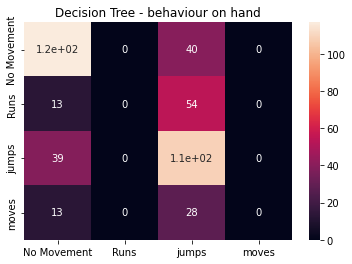

In [34]:
x_axis_labels = class_names
y_axis_labels = class_names

# create seabvorn heatmap with required labels
ax=sns.heatmap(cf_matrix, xticklabels=x_axis_labels, yticklabels=y_axis_labels,annot=True)

ax.set_title('Decision Tree - behaviour on hand (U)')
plt.show()


In [35]:
import pydotplus
import collections

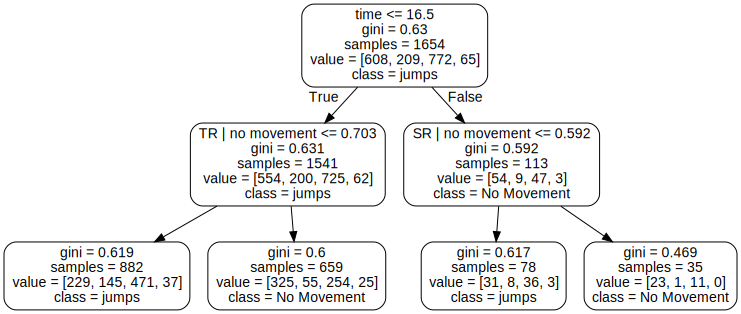

In [36]:
dot_data = tree.export_graphviz(RF_1,  
                                feature_names = list(caly_df), 
               class_names=class_names,
               rounded=True, 
               filled = False,out_file=None)
graph = graphviz.Source(dot_data, format="png") 
graph

In [37]:
graph.format = 'png'
graph.render('Decision Tree - behaviour on hand (U)',view=True)

'Decision Tree - behaviour on hand (U).png'

In [38]:
dane_do_zapisu_1.to_csv('Geko_DT_U_behaviour on hand.csv',sep=',')